In [8]:

# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst data
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

<Axes: xlabel='job_posted_month'>

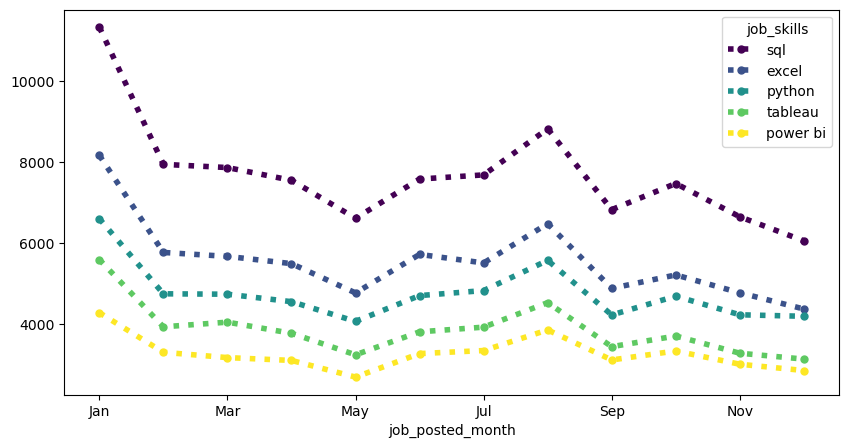

In [9]:
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

df_da['job_posted_month_no'] = df_da['job_posted_date'].dt.month

df_da_explode = df_da.explode(column= 'job_skills')
df_da_pivot = df_da_explode.pivot_table(index= 'job_posted_month_no', columns= 'job_skills', aggfunc= 'size', fill_value= 0)

df_da_pivot.loc['Total'] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending= False).index]
df_da_pivot = df_da_pivot.drop('Total')

df_da_pivot = df_da_pivot.reset_index()
df_da_pivot['job_posted_month'] = df_da_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format= '%m').strftime("%b"))
df_da_pivot = df_da_pivot.set_index('job_posted_month')
df_da_pivot = df_da_pivot.drop(columns= 'job_posted_month_no')

df_da_pivot.iloc[:, :5].plot(
    kind= 'line',
    linewidth= 4,
    linestyle= ':',
    colormap= 'viridis',
    marker= 'o',
    markersize= 5,
    figsize= (10,5)

    )


In [10]:
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df = df[df['job_title_short'] == 'Data Scientist']

In [12]:
df_exp = df.explode('job_skills')
df_exp

skill_stat = df_exp.groupby('job_skills').agg(
    skill_count= ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_stat = skill_stat.sort_values(by= 'skill_count', ascending= False).head(20)
skill_stat

,skill_count,median_salary
job_skills,,
python,113711,130500.0
sql,78982,132500.0
r,59566,125000.0
sas,29534,119000.0
tableau,29445,125000.0
aws,26256,132500.0
spark,24286,135000.0
azure,21664,127500.0
tensorflow,19153,140000.0


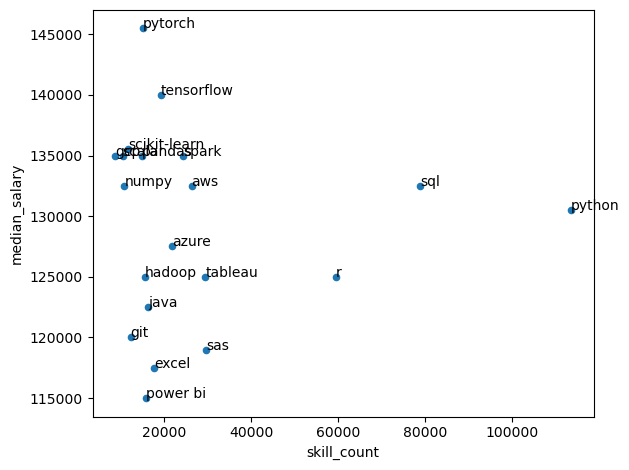

In [13]:
skill_stat.plot(kind= 'scatter', x= 'skill_count', y='median_salary')

for i, txt in enumerate(skill_stat.index):
    plt.text(skill_stat['skill_count'].iloc[i],skill_stat['median_salary'].iloc[i], txt)

plt.tight_layout()

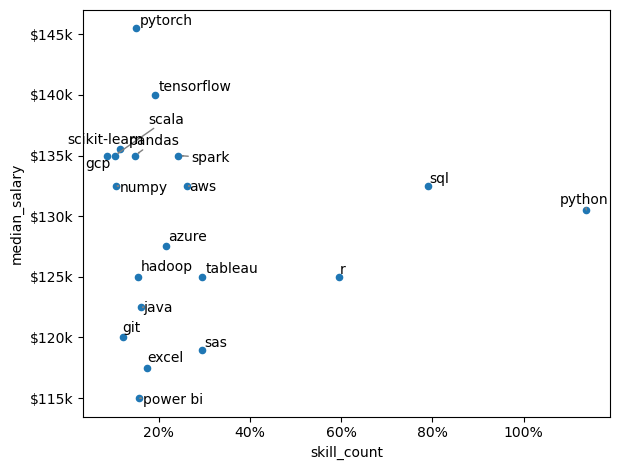

In [14]:
from adjustText import adjust_text

# fig, ax = plt.subplots()


skill_stat.plot(kind= 'scatter', x= 'skill_count', y='median_salary')
texts = []

for i, txt in enumerate(skill_stat.index):
    texts.append(plt.text(skill_stat['skill_count'].iloc[i],skill_stat['median_salary'].iloc[i], txt))
    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color= 'gray'))
plt.tight_layout()

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, post: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f'{int(x/1000)}%'))